In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from numpy.random import multinomial

def bootstrap(series, n=1000, *args, **kwargs):
    samples = multinomial(series.sum(), series/series.sum(), n)
    return samples

In [24]:
import numpy as np

from lint.models import Token

def plot_bootstrap(token):
    
    series = Token.token_series(token)
    
    expected = series.sum() / len(series)

    bs = bootstrap(np.full(len(series), expected))

    plt.figure(figsize=(10,10))

    plt.plot(bs.mean(0))

    plt.fill_between(
        range(100),
        bs.mean(0) + 2*bs.std(0),
        bs.mean(0) - 2*bs.std(0),
        color='black',
        alpha=0.1,
    )
    
    plt.plot(series)
    
    zscores = np.array([
        abs(mean-observed)/std
        for mean, std, observed in zip(bs.mean(0), bs.std(0), series)
        if mean > 0
    ])

    print(token, zscores.mean())
    plt.show()

school 12.0987448429


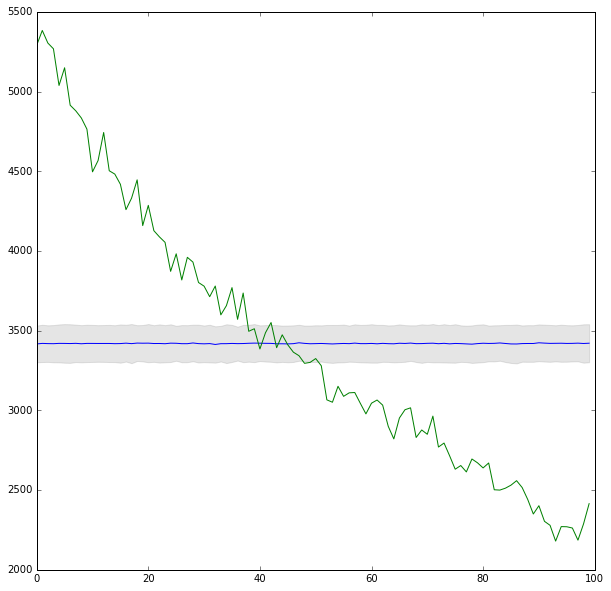

In [30]:
plot_bootstrap('school')

In [34]:
def mean_zscore(token):
    
    series = Token.token_series(token)
    
    expected = series.sum() / len(series)

    bs = bootstrap(np.full(len(series), expected))
    
    zscores = np.array([
        abs(mean-observed)/std
        for mean, std, observed in zip(bs.mean(0), bs.std(0), series)
        if mean > 0
    ])

    return zscores.mean()

In [37]:
from joblib import Memory

from lint.models import Token

mem = Memory('cache')

token_counts = mem.cache(Token.token_counts)

tokens = token_counts(10000)

In [39]:
data = [
    (token, count, mean_zscore(token))
    for token, count in tokens.items()
]

In [40]:
import pandas as pd

df = pd.DataFrame(data, columns=('token', 'count', 'score'))

df.sort_values('score', ascending=False, inplace=True)

In [41]:
pd.set_option('display.max_rows', 1000)

df.head(100)

,token,count,score
4,a,45188898,21.772227
11,you,21824060,20.489467
5,i,32831159,18.067279
153,young,1539567,14.361794
0,the,112517604,14.016791
3,of,51317715,13.885047
206,years,1177206,13.679178
29,me,8684913,13.639369
25,him,10397590,13.166159
581,school,341948,12.047001
